In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 데이터를 불러옵니다.
data1 = pd.read_csv('/content/Testfile1.csv')
data2 = pd.read_csv('/content/Testfile2.csv')
data3 = pd.read_csv('/content/Testfile3.csv')
data4 = pd.read_csv('/content/Testfile4.csv')

In [4]:
data1.describe()

,Time(s),VOLT 1,VOLT 2,VOLT 3,VOLT 4,VOLT 5,VOLT 6,VOLT 7,VOLT 8,VOLT 9
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,2.495107,1.013192,1.020407,1.022669,1.004779,0.979085,0.996622,1.018061,1.008705,1.026076
std,1.448532,0.149235,0.027505,0.029409,0.118965,0.094403,0.094242,0.046420,0.046586,0.045978
min,-0.008332,0.000001,0.834918,0.832243,0.195190,0.335088,0.354287,0.699998,0.690592,0.714333
25%,1.238345,1.033644,1.015294,1.014639,1.018147,0.987180,1.003962,1.016070,1.005905,1.022271
50%,2.493341,1.038110,1.025000,1.025000,1.025788,0.995631,1.012654,1.025769,1.015883,1.032353
75%,3.748315,1.040161,1.032640,1.037722,1.028567,1.000247,1.018234,1.033438,1.024668,1.042704
max,5.003345,1.045761,1.040948,1.048452,1.035989,1.008399,1.026672,1.042123,1.033876,1.052526


In [6]:
# 데이터를 전처리합니다.
scaler = MinMaxScaler()
scaled_data1 = scaler.fit_transform(data1.drop('Time(s)', axis=1))


In [25]:
# 데이터를 전처리합니다.
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(data2.drop('Time(s)', axis=1))


In [26]:
# 데이터를 전처리합니다.
scaler = MinMaxScaler()
scaled_data3 = scaler.fit_transform(data3.drop('Time(s)', axis=1))


In [27]:
# 데이터를 전처리합니다.
scaler = MinMaxScaler()
scaled_data4 = scaler.fit_transform(data4.drop('Time(s)', axis=1))


In [7]:
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data1[:, 1:], scaled_data1[:, 0], test_size=0.2, random_state=42)

### 변수명이 다 똑같기 때문에 testfile 어떤 걸 썼는지 확인해야 함

In [ ]:
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data1[:, 1:], scaled_data2[:, 0], test_size=0.2, random_state=42)

In [ ]:
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data1[:, 1:], scaled_data3[:, 0], test_size=0.2, random_state=42)

In [ ]:
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data1[:, 1:], scaled_data4[:, 0], test_size=0.2, random_state=42)

#### data1

In [8]:
# LSTM 모델을 생성합니다.
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')


In [9]:
# LSTM 모델을 훈련합니다.
lstm_model.fit(X_train, y_train, epochs=50, verbose=0)

In [13]:
import matplotlib.pyplot as plt

In [18]:
evaluation = lstm_model.evaluate(X_test, y_test)
print(evaluation)

8/8 [==============================] - 0s 8ms/step - loss: 1.0087e-04
0.0001008660183288157


In [20]:
# 모델 평가
evaluation = lstm_model.evaluate(X_test, y_test)
test_loss = evaluation  # 손실값

print(f"Test Loss: {test_loss:.4f}")

8/8 [==============================] - 0s 3ms/step - loss: 1.0087e-04
Test Loss: 0.0001


In [37]:
# CNN 모델을 생성합니다.
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

In [11]:
# CNN 모델을 훈련합니다.
cnn_model.fit(X_train, y_train, epochs=50, verbose=0)

In [21]:
# 모델 평가
evaluation = cnn_model.evaluate(X_test, y_test)
test_loss = evaluation  # 손실값

print(f"Test Loss: {test_loss:.4f}")

8/8 [==============================] - 0s 2ms/step - loss: 7.9191e-06
Test Loss: 0.0000


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

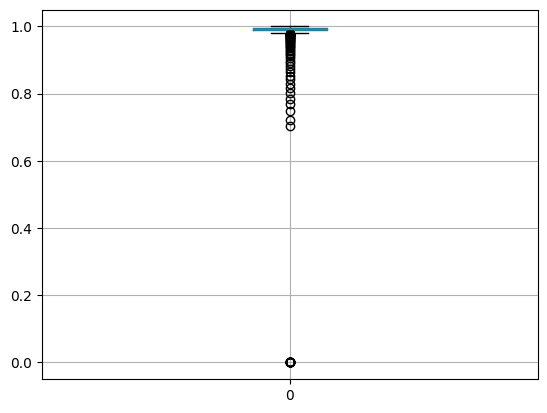

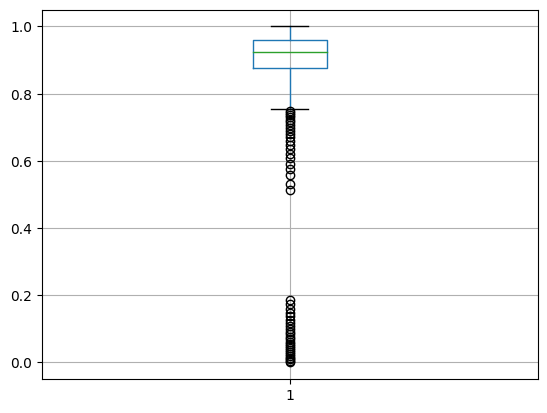

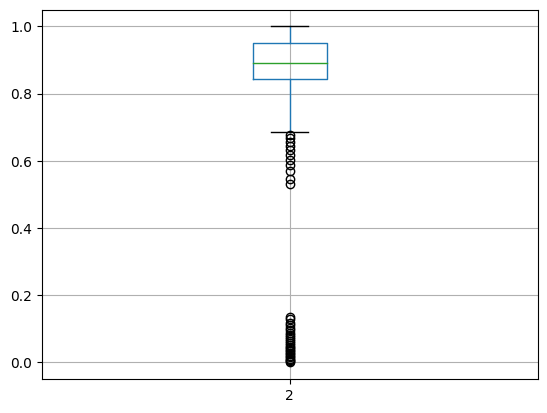

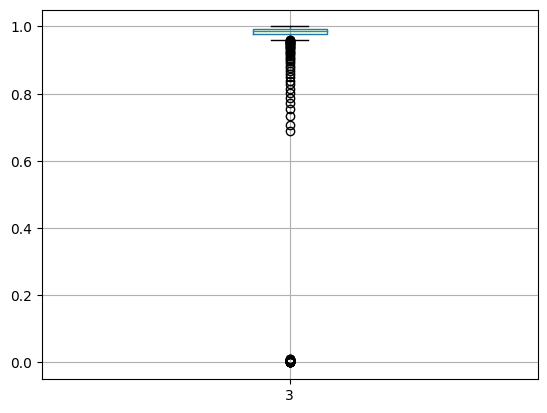

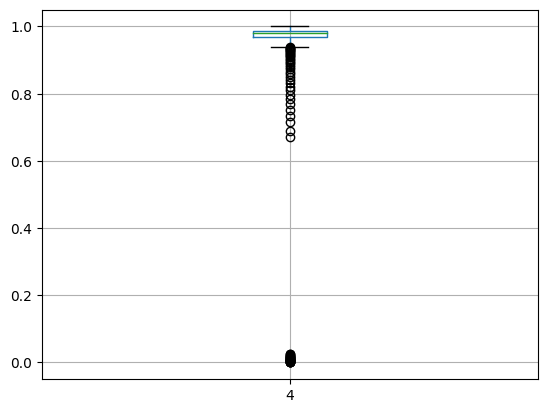

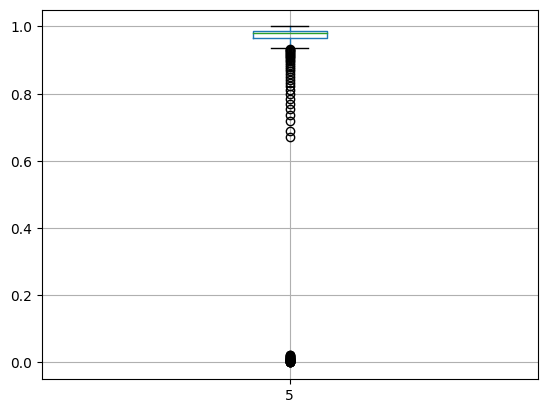

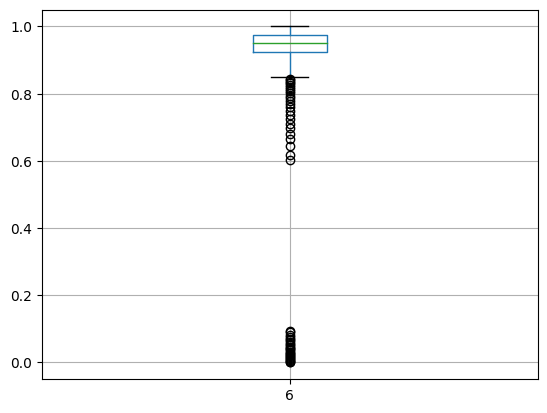

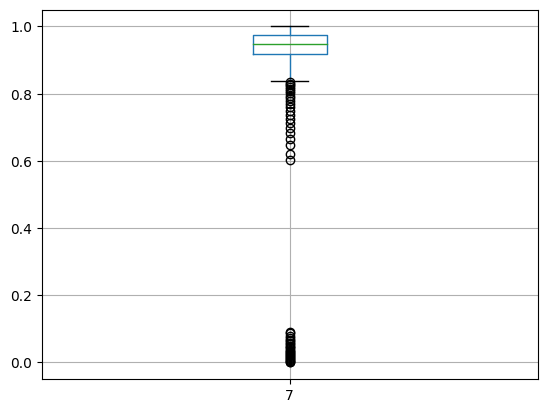

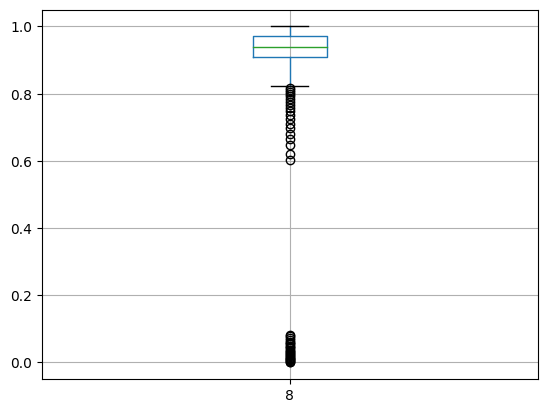

In [24]:
df = pd.DataFrame(scaled_data1)

# 각 열별로 박스 플롯 그리기
for column in df:
    plt.figure()  # 새로운 그래프 생성
    df.boxplot([column])  # 해당 열의 박스 플롯 그리기

plt.show()  # 그래프 출력

In [28]:
### data2
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data1[:, 1:], scaled_data2[:, 0], test_size=0.2, random_state=42)

In [29]:
# LSTM 모델을 훈련합니다.
lstm_model.fit(X_train, y_train, epochs=50, verbose=0)

In [30]:
# CNN 모델을 훈련합니다.
cnn_model.fit(X_train, y_train, epochs=50, verbose=0)

In [31]:
# 모델 평가
evaluation2 = lstm_model.evaluate(X_test, y_test)
test_loss = evaluation2  # 손실값

print(f"Test Loss: {test_loss:.4f}")

8/8 [==============================] - 0s 5ms/step - loss: 3.8383e-05
Test Loss: 0.0000


In [32]:
# 모델 평가
evaluation2 = cnn_model.evaluate(X_test, y_test)
test_loss = evaluation2  # 손실값

print(f"Test Loss: {test_loss:.4f}")

8/8 [==============================] - 0s 2ms/step - loss: 9.5825e-07
Test Loss: 0.0000


In [33]:
### data3
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data3[:, 1:], scaled_data3[:, 0], test_size=0.2, random_state=42)

In [34]:
# LSTM 모델을 훈련합니다.
lstm_model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
# CNN 모델을 훈련합니다.
cnn_model.fit(X_train, y_train, epochs=50, verbose=0)

In [42]:
# 모델 평가
evaluation = lstm_model.evaluate(X_test, y_test)
test_loss = evaluation  # 손실값

print(f"Test Loss: {test_loss:.9f}")

8/8 [==============================] - 0s 6ms/step - loss: 2.8706e-05
Test Loss: 0.000028706


In [43]:
# 모델 평가
evaluation2 = cnn_model.evaluate(X_test, y_test)
test_loss = evaluation2  # 손실값

print(f"Test Loss: {test_loss:.9f}")

8/8 [==============================] - 0s 4ms/step - loss: 1.0807e-07
Test Loss: 0.000000108


In [44]:
##### data 4
# 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(scaled_data4[:, 1:], scaled_data4[:, 0], test_size=0.2, random_state=42)

In [45]:
# LSTM 모델을 훈련합니다.
lstm_model.fit(X_train, y_train, epochs=50, verbose=0)

In [46]:
# CNN 모델을 훈련합니다.
cnn_model.fit(X_train, y_train, epochs=50, verbose=0)

In [47]:
# 모델 평가
evaluation = lstm_model.evaluate(X_test, y_test)
test_loss = evaluation  # 손실값

print(f"Test Loss: {test_loss:.9f}")

8/8 [==============================] - 0s 4ms/step - loss: 1.4364e-06
Test Loss: 0.000001436


In [48]:
# 모델 평가
evaluation2 = cnn_model.evaluate(X_test, y_test)
test_loss = evaluation2  # 손실값

print(f"Test Loss: {test_loss:.9f}")

8/8 [==============================] - 0s 2ms/step - loss: 1.6867e-07
Test Loss: 0.000000169


### 여기까지 모델 학습